# **IMPORTING NECESSARY LIBRARIES**

In [ ]:
import pandas as pd
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from sklearn.neighbors import NearestNeighbors
import gensim
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **IMPORTING DATA**

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset.csv')
data.head()

,DocID,Doc
0,1,Since OpenAI released its blockbuster bot Chat...
1,2,Other tech companies like Google and Meta have...
2,3,The founder of the controversial DoNotPay serv...
3,4,Chat GPT is an AI chatbot auto-generative syst...


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

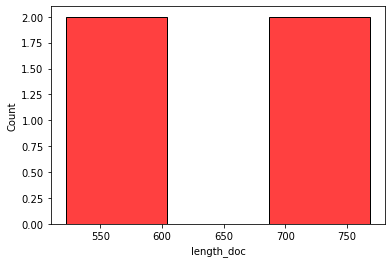

In [ ]:
data['length_doc'] = data['Doc'].str.len()
sns.histplot(data['length_doc'], color="r")
plt.show()

# **PREPROCESSING STEPS**

In [ ]:
stemmer = SnowballStemmer('english')

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]') # removing punctuations
        text = regex.sub(" ", text.lower()) # lowercasing
        words = text.split(" ") # tokenization
        words = [re.sub('\S*@\S*\s?', '', sent) for sent in words] # special chars
        # words = [re.sub('\s+', ' ', sent) for sent in words]
        words = [re.sub("\'", "", sent) for sent in words] # apostrophes
        if token not in stop_words and len(token) > 3: # not stopword && length>3
            result.append(lemmatize_stemming(token)) # lematize and then stem
    return " ".join(result)

# **PREPROCESSING THE DOCS**

In [ ]:
preprocessed_docs=[preprocess(doc) for doc in data['Doc']]
# print(preprocessed_docs)
for i in range(len(preprocessed_docs)):
  print(i+1, preprocessed_docs[i])

1 sinc openai releas blockbust chatgpt novemb user casual experi tool even insid report tri simul news stori messag potenti date older millenni grow chat room text instant messag system person tone convers evok experi chat onlin chatgpt latest technolog know larg languag model tool speak sentienc think peopl
2 tech compani like googl meta develop larg languag model tool program take human prompt devis sophist respons openai revolutionari move also creat user interfac let general public experi direct recent effort chat bot real world servic prove troubl result mental health compani koko come fire month founder write compani use experi repli user
3 founder controversi donotpay servic claim drive chat help user resolv custom servic disput also say lawyer would advis defend actual courtroom traffic case real time though later walk back concern risk chat chatbot develop open chatbot languag base model develop fine tune human interact convers manner effect simul chatbot primarili design cust

# **PREPROCESSING THE QUERY**

In [ ]:
query="OpenAI chatbot chatGPT"
query=preprocess(query)
query

'openai chatbot chatgpt'

# **CALCULATING TF-IDF SCORES**

In [ ]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(preprocessed_docs) # converting doc to vector (calculating weights)
feature_names = vectorizer.get_feature_names_out() # geting the words
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
query_vector = vectorizer.transform([query]) # convert query to vector

# **TF-IDF SCORES**

In [ ]:
df

,actual,advis,also,answer,articl,assist,auto,back,base,blockbust,...,tune,use,user,various,virtual,walk,websit,world,would,write
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.147417,...,0.000000,0.000000,0.094094,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.089384,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.110408,0.178769,0.000000,0.000000,0.000000,0.000000,0.140038,0.000000,0.089384
2,0.123989,0.123989,0.079140,0.000000,0.000000,0.000000,0.000000,0.123989,0.123989,0.000000,...,0.123989,0.000000,0.079140,0.097754,0.000000,0.123989,0.000000,0.000000,0.097754,0.079140
3,0.000000,0.000000,0.072443,0.113496,0.226993,0.113496,0.113496,0.000000,0.000000,0.000000,...,0.000000,0.089482,0.000000,0.089482,0.113496,0.000000,0.113496,0.000000,0.089482,0.217330


# **TRAINING THE MODEL**

In [ ]:
k = 2 # Number of nearest neighbors to retrieve (no. of docs to retrieve)
knn_model = NearestNeighbors(n_neighbors=k)
knn_model.fit(vectors)

NearestNeighbors(n_neighbors=2)

# **FINDING THE NEAREST NEIGHBOURS(MOST SIMILAR DOCS)**

In [ ]:
distances, indices = knn_model.kneighbors(query_vector) # indices has the index number of the closest docs

# **PRINTING THE MOST SIMILAR DOCS**

In [ ]:
for i in range(k):
    print("Document", indices[0][i]+1, ":",data["Doc"][indices[0][i]])

Document 1 : Since OpenAI released its blockbuster bot ChatGPT in November, users have casually experimented with the tool, with even Insider reporters trying to simulate news stories or message potential dates.To older millennials who grew up with IRC chat rooms — a text instant message system — the personal tone of conversations with the bot can evoke the experience of chatting online. But ChatGPT, the latest in technology known as 'large language model tools,' doesn't speak with sentience and doesn't 'think' the way people do.
Document 3 : The founder of the controversial DoNotPay service, which claims its GPT-3-driven chat bot helps users resolve customer service disputes, also said an AI 'lawyer' would advise defendants in actual courtroom traffic cases in real time, though he later walked that back over concerns about its risks. Chat GPT is an AI Chatbot developed by Open AI. The chatbot has a language-based model that the developer fine-tunes for human interaction in a conversat